In [12]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sb
import matplotlib.pyplot as plt


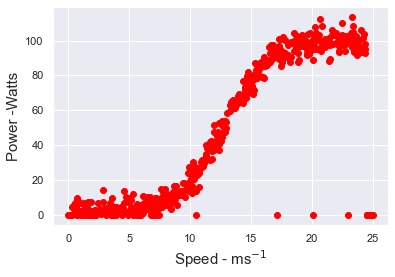

In [17]:
# Seabord plots
sb.set()

# Find and read the powerproduction dataframe
lin_data = pd.read_csv('powerproduction.csv')

# X and y values for regression
X = lin_data.iloc[:, 0].values
y = lin_data.iloc[:, 1].values

# Plot the data in a scatterplot
def scatter_plot(X, y):
    # scatter plot of data set
    plt.scatter(X, y, color="red");
    
    # the x label of plot
    plt.xlabel("Speed - ms$^{-1}$", fontsize=15)
    
    # the y label of plot
    plt.ylabel("Power -Watts", fontsize=15)
    
    
scatter_plot(X, y)